1. 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교
2. 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
3. 고령자 대비 cctv 비율
4. 외국인 대비 cctv 비율

- 사용 데이터 
- .서울시 지자체별 cctv 현황 data/01. CCTV_in_Seoul.csv
- .서울시 지자체별 인구 현황 data/01.population_in_Seoul.xls


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [85]:
# CCTV 데이터 읽어오기


# 판다스의 READ_CSV("경로를 포함한 파일명",encoding="인코딩명")
# 데이터에 한글이 포함되어 있는 경우:인코딩 방식을 설정

CCTV_Seoul=pd.read_csv("../date/01. CCTV_in_Seoul.csv")
CCTV_Seoul.head()

CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [4]:
# CCTV_Seoul df의 컬럼명을 확인
# df.columns
CCTV_Seoul.columns

CCTV_Seoul.columns[0]

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

'기관명'

In [5]:
# 기관명 열이름의 전달력이 떨어져서 컬럼명 변경
# 컬럼명변경: df.rename(columns={바꿀위치:"변경이름"})  >>>>rename는 원본반영안됨
# df.rename(columns={바꿀위치:"변경이름"}, inplace=True)>>>>> 원본변경
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:"구별"},inplace=True)
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [6]:
# 서울시 인구현황 데이터 가져오기- 엑셀파일 읽어오기
# pd.read_excel("파일명")


pop_Seoul=pd.read_excel("../date/01.population_in_Seoul.xls")
pop_Seoul.head

# 원본데이터가 다중인덱스여서 행을 스킵해야하고 컬럼중에 필요한  컬럼만 추출할 필요가 있음

<bound method NDFrame.head of           기간   자치구       세대        인구     인구.1     인구.2     인구.3     인구.4  \
0         기간   자치구       세대        합계       합계       합계      한국인      한국인   
1         기간   자치구       세대         계       남자       여자        계       남자   
2   2017.1/4    합계  4202888  10197604  5000005  5197599  9926968  4871560   
3   2017.1/4   종로구    72654    162820    79675    83145   153589    75611   
4   2017.1/4    중구    59481    133240    65790    67450   124312    61656   
5   2017.1/4   용산구   106544    244203   119132   125071   229456   111167   
6   2017.1/4   성동구   130868    311244   153768   157476   303380   150076   
7   2017.1/4   광진구   158960    372164   180992   191172   357211   174599   
8   2017.1/4  동대문구   159839    369496   182932   186564   354079   177021   
9   2017.1/4   중랑구   177548    414503   206102   208401   409882   204265   
10  2017.1/4   성북구   188512    461260   224076   237184   449773   219545   
11  2017.1/4   강북구   141554    330192   161686

In [7]:
#필요 data 만 가져오기, 자치구, 전체인구수,한국인,외국인,고령자(B,D,G,J,N)
#2행을 skip하고 3행을 header 처리


In [8]:
pop_Seoul=pd.read_excel("../date/01.population_in_Seoul.xls",
                        header=2, # 행스킵 
                        usecols="B,D,G,J,N")# 열선택
pop_Seoul.head

<bound method NDFrame.head of      자치구           계        계.1       계.2   65세이상고령자
0     합계  10197604.0  9926968.0  270636.0  1321458.0
1    종로구    162820.0   153589.0    9231.0    25425.0
2     중구    133240.0   124312.0    8928.0    20764.0
3    용산구    244203.0   229456.0   14747.0    36231.0
4    성동구    311244.0   303380.0    7864.0    39997.0
5    광진구    372164.0   357211.0   14953.0    42214.0
6   동대문구    369496.0   354079.0   15417.0    54173.0
7    중랑구    414503.0   409882.0    4621.0    56774.0
8    성북구    461260.0   449773.0   11487.0    64692.0
9    강북구    330192.0   326686.0    3506.0    54813.0
10   도봉구    348646.0   346629.0    2017.0    51312.0
11   노원구    569384.0   565565.0    3819.0    71941.0
12   은평구    494388.0   489943.0    4445.0    72334.0
13  서대문구    327163.0   314982.0   12181.0    48161.0
14   마포구    389649.0   378566.0   11083.0    48765.0
15   양천구    479978.0   475949.0    4029.0    52975.0
16   강서구    603772.0   597248.0    6524.0    72548.0
17   구로구    4478

In [9]:
# 컬럼명 변경
#0: 구별
#1:인구수
#2:한국인
#3:외국인
#4:고령자
pop_Seoul.rename(columns={pop_Seoul.columns[0]:"구별",
                          pop_Seoul.columns[1]:"인구수",
                         pop_Seoul.columns[2]:"한국인",
                         pop_Seoul.columns[3]:"외국인",
                         pop_Seoul.columns[4]:"고령자",
                         },inplace=True)

pop_Seoul.head

<bound method NDFrame.head of       구별         인구수        한국인       외국인        고령자
0     합계  10197604.0  9926968.0  270636.0  1321458.0
1    종로구    162820.0   153589.0    9231.0    25425.0
2     중구    133240.0   124312.0    8928.0    20764.0
3    용산구    244203.0   229456.0   14747.0    36231.0
4    성동구    311244.0   303380.0    7864.0    39997.0
5    광진구    372164.0   357211.0   14953.0    42214.0
6   동대문구    369496.0   354079.0   15417.0    54173.0
7    중랑구    414503.0   409882.0    4621.0    56774.0
8    성북구    461260.0   449773.0   11487.0    64692.0
9    강북구    330192.0   326686.0    3506.0    54813.0
10   도봉구    348646.0   346629.0    2017.0    51312.0
11   노원구    569384.0   565565.0    3819.0    71941.0
12   은평구    494388.0   489943.0    4445.0    72334.0
13  서대문구    327163.0   314982.0   12181.0    48161.0
14   마포구    389649.0   378566.0   11083.0    48765.0
15   양천구    479978.0   475949.0    4029.0    52975.0
16   강서구    603772.0   597248.0    6524.0    72548.0
17   구로구    4478


각 데이터 파악하기

-CCTV_Seoul 데이터프레임 , pop_Seoul 데이터프레임





In [10]:
# CCTV_Seoul  데이터 프레임

CCTV_Seoul.head(5)
CCTV_Seoul.tail(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [11]:
# pop_Seoul 데이터 프레임


pop_Seoul.head(5)
pop_Seoul.tail(5)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [12]:
## 개요 확인

CCTV_Seoul.info()
pop_Seoul.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구별         25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [13]:
# 기본 통계량 확인
CCTV_Seoul.describe()
pop_Seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1515.320000,764.760000,159.480000,205.200000,385.880000
std,616.774656,415.510257,104.132976,137.877059,182.479981
min,825.000000,238.000000,21.000000,30.000000,81.000000
25%,1010.000000,464.000000,78.000000,103.000000,292.000000
50%,1327.000000,573.000000,142.000000,184.000000,377.000000
75%,1884.000000,1070.000000,218.000000,269.000000,467.000000
max,3238.000000,1843.000000,430.000000,584.000000,932.000000


,인구수,한국인,외국인,고령자
count,2.600000e+01,2.600000e+01,26.000000,2.600000e+01
mean,7.844311e+05,7.636129e+05,20818.153846,1.016506e+05
std,1.924156e+06,1.873421e+06,51598.169516,2.491801e+05
min,1.332400e+05,1.243120e+05,2017.000000,2.076400e+04
25%,3.348055e+05,3.316718e+05,4489.000000,4.831200e+04
50%,4.135115e+05,4.051690e+05,9079.500000,5.439750e+04
75%,4.907855e+05,4.864445e+05,14901.500000,6.431075e+04
max,1.019760e+07,9.926968e+06,270636.000000,1.321458e+06


# cctv 현황 확인

In [14]:
# 소계 컬럼을 활용해서 설치대수가 많은 구와 적은 구를 확인(5개구를 확인)

# 소개를 기준으로 정렬 후에 head() 이용해서 확인

# 설치대수가 적은 5개 구

CCTV_Seoul.sort_values(by="소계").head(5)

# 도붕구가 가장 적게 CCTV를 보유하고 있고 , 그 뒤로 강북구,광진구 순으로 나타남



,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [15]:
# 설치대수가 많은 5개 구

CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

# 강남구가 가장 많은 cctv를 보유 양천구 ,서초구 순으로 나타남

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468




### data상 최근 3개년 동안 cctv가 얼마나 증가했는지 확인
- 각 연도별 cctv 대수는 해당년도에 설치한대수를 의미
- CCTV_Seoul["최근 증가율"]=(2014+2015+2016)/2013*100


In [16]:
CCTV_Seoul["최근 증가율"]=(CCTV_Seoul["2016년"]+
                          CCTV_Seoul["2015년"]+
                          CCTV_Seoul["2014년"])/+CCTV_Seoul["2013년도 이전"]*100

CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [17]:
# 최근 증가율이 높은 3개구를 확인

CCTV_Seoul.sort_values(by='최근 증가율', ascending=False).head(3)


# 도봉구는 설치된 cctv 대수는 가장 적지만 최근 3개년동안 증가율은 높은편임

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911


In [18]:
# 최근 증가율이 낮은 3개구를 확인

CCTV_Seoul.sort_values(by='최근 증가율', ascending=True).head(3)

# 양천구는 cctv 설치수는 2번쨰로 많은 구 이지만 최근 증가율은 낮은편임


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
18,양천구,2482,1843,142,30,467,34.671731
13,서대문구,1254,844,50,68,292,48.578199
20,용산구,2096,1368,218,112,398,53.216374


In [19]:
### 서울시 인구 데이터 파악
# - 사용변수 : pop_Seoul

pop_Seoul.head()
pop_Seoul.tail()


,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [20]:
# 첫 행 삭제 필요
# 삭제명령어 :del>원본반영> 열삭제시 주로
# 삭제함수:drop()>원본반영안됨> 행삭제시 드롭 사용

pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()


,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [21]:
# 인구데이터에 서울시 25개구가 모두 있는지 확인

len(pop_Seoul) #26행 -필요없는 데이터가 잇다고 추측가능

26

In [22]:
# 각 구별 데이터가 중복되지 않았는지 확인: 구별 컬럼의 원소를 중복을 제거하고 출력해서 확인
# unique()
pop_Seoul["구별"].unique()

len(pop_Seoul["구별"].unique())   # 결과가 26개 이므로 중복 원소는 없다

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

26

In [23]:
# 구별 원소값에 nan값이 있는지 확인: isnull()

# 조건식을 이용해서 인덱싱을 진행하며 null이 포함되어 있는 행을 반환받을 수있음
pop_Seoul[pop_Seoul["구별"].isnull()]  #26행이 결측치

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [24]:
pop_Seoul.drop(26, inplace=True)
pop_Seoul.tail(5)

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [25]:
len(pop_Seoul) 

25

- 인구 데이터를 활용한 가공필드
    - 전체 인구수 대비 외국인 비율 계산: pop_Seoul["외국인비율"]
    - 전체 인구수 대비 외국인 비율 계산: pop_Seoul["고령자비율"]

In [26]:
pop_Seoul["외국인비율"]=pop_Seoul["외국인"]/pop_Seoul["인구수"]*100
pop_Seoul["고령자비율"]=pop_Seoul["고령자"]/pop_Seoul["인구수"]*100

In [27]:
pop_Seoul.head()
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [28]:
# 인구가 많은 5개 구

pop_Seoul.sort_values(by='인구수', ascending=False).head()

# 송파구가 인구가 가장 많음

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [29]:
# 외국인 비율이 높은 5개구
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

#  외국인수가 많은 5개 구
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [30]:
# 고령자 비율이 높은 5개구
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

#  고령자 수가 많은 5개 구
pop_Seoul.sort_values(by='고령자', ascending=False).head()


# 강북구가 고령자 비율이 높은 반면에 고령자 절대 수치는 강서구가 높게 나타남

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 분석 목적: 각 지자체별 인구수 대비 cctv 대수의 적정성을 확인


- 데이터를 병합해서 확인


- key로 사용할 공통 열이 있어야 함

- 두 데이터 프레임어 "구별" 공통 열이 존재: 키로 사용

- 두 데이터 프레임의 행은 25개 구로 동일하게 data가 있으니 how는 어떤걸 사용해도 됨



In [35]:
data_result=pd.merge(CCTV_Seoul,pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [36]:
#병합 후 사용하지 않을 컬럼은 삭제
#열 삭제시 del 이 가장 안정적
#cctv 데이터의 2013-2016필드 삭제


del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [ ]:
#df의 행을 대표하는 컬럼이 잇으면 해당 컬럼을 인덱스로 설정하면 시각화 등의 작업에 효율적
- 구별 컬럼을 인덱스로 설정(df.set_index(컬럼명, inplace=True))
- inplace=True 원본에 반영


In [37]:
data_result.set_index("구별", inplace=True)

data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# cctv와 인구현황에 대한  시각화 작업

In [38]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
    


In [39]:
# 사용 data
data_result.head()


,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='구별'>

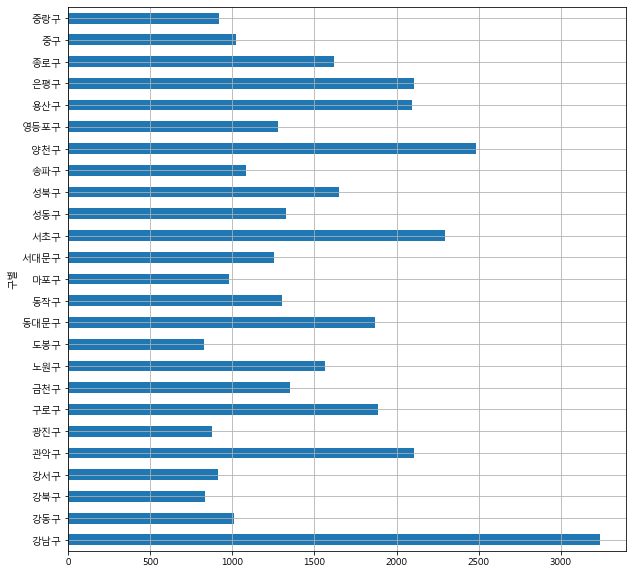

In [40]:
# 각 구별로 cctv 대수가 얼마나 차이가 나는지 시각화 통해서 확인
plt.figure(figsize=(10,10))
data_result["소계"].plot(kind="barh", grid=True)
plt.show()



<Figure size 720x720 with 0 Axes>

구별
도봉구      825
강북구      831
광진구      878
강서구      911
중랑구      916
마포구      980
강동구     1010
중구      1023
송파구     1081
서대문구    1254
영등포구    1277
동작구     1302
성동구     1327
금천구     1348
노원구     1566
종로구     1619
성북구     1651
동대문구    1870
구로구     1884
용산구     2096
은평구     2108
관악구     2109
서초구     2297
양천구     2482
강남구     3238
Name: 소계, dtype: int64

<BarContainer object of 25 artists>

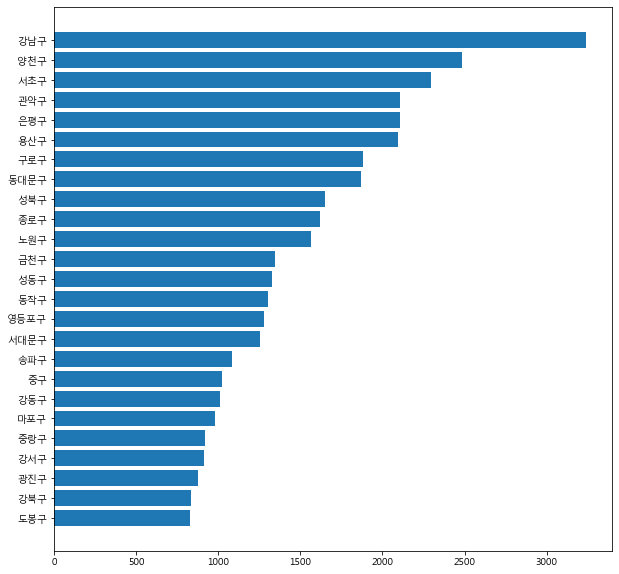

In [41]:

# 각 구별로 cctv 대수가 얼마나 차이가 나는지 시각화 통해서 확인2
plt.figure(figsize=(10,10))
sort_cctv=data_result["소계"].sort_values()
sort_cctv
plt.barh(sort_cctv.index, sort_cctv)
plt.show()

### 다수의 데이터의 상관관계를 비교
- 인구와 관련된 각 필드와 CCTV 소계와의 상관관계를 파악해서 그래프로 표현

- 상관관계  : 두 변수의 관련성을 확인하는 방법
    - 계산 결과의 절대값이 클수록 두 데이터는 관계가 있다고 봄

    - 상관관계 계산 함수
        - numpy 패키지의 corrcoef(데이터 값1, 데이터 값2)
        
        - 절대값 기준
            - 0.1이하면 무시
            - 0.3이하면 약한 상관 관계
            - 0.7을 기준으로 강한 상관관계가 있다 봄


#상관관계를 파악할 컬럼

#전체 cctv 대수와 전체 인구수
#전체 cctv 대수와 고령자 비율
#전체 cctv 대수와 외국인 비율


In [43]:
#전체 cctv 대수와 전체 인구수
np.corrcoef(data_result["소계"],data_result["인구수"])

# 상관계수 0.2432(0.3 이하)이므로 약한 상관관계

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

In [44]:
#전체 cctv 대수와 고령자 비율
np.corrcoef(data_result["소계"],data_result["고령자비율"])

# 약한 음의 상관관계-수치가 반대로 간다=즉 고령자비율이 높다고 해서 cctv가 많아지는게 아니다

array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

In [45]:
#전체 cctv 대수와 외국인 비율
np.corrcoef(data_result["소계"],data_result["외국인비율"])
#절대값이 0.1 이하이면 관계가 없다

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

1. cctv 는 강남구가 가장 많이 설치되어 있음

2. 인구수, 외국인비율, 고령자비율과 cctv의 상관관계를 확인했을때
    - 인구수 vs cctv
    - 고령자 비율 vs cctv 가 약한 상관관계를 보임
    
3. 인구수 vs cctv 의 그래프 그리기

4. 각 구별로 인구수 대비 cctv 설치비율을 확인해서
    - 인구수와 설치비율 데이터 관계 확인
- 가공필드 작성

#####  인구수 대비 cctv가 많이 설치되어 있는 지역 찾기


In [48]:
# 인구수 대비 cctv 설치 비율 계산-가공필드 "cctv비율"  생성


data_result["cctv비율"]=data_result['소계']/data_result["인구수"]*100
data_result.head()


,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


<AxesSubplot:ylabel='구별'>

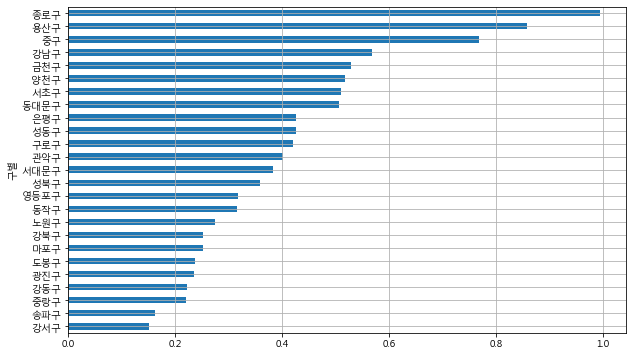

In [87]:
# 인구대비 cctv 설치수("cctv비율")가 높은 지역순으로 그래프
data_result["cctv비율"].sort_values().plot(kind="barh",grid=True,figsize=(10,6))

- 인구대비 cctv 비율은 용상구,종로구,중구가 월등히 높다.주거지역이 적고 유동인구가 많은 대표 지역

In [ ]:
# 인구수와 cctv 대수를 비교하는 scatter(분산)그래프 그리기

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'cctv')

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

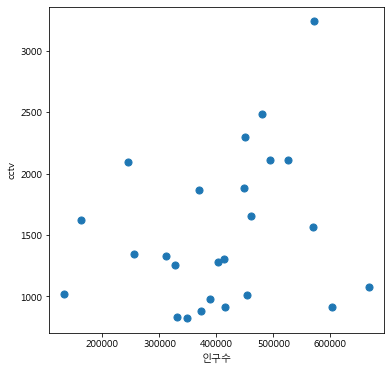

In [64]:
# 마커 크기 50으로 설정
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"],s=50)
plt.xlabel("인구수")
plt.ylabel("cctv")

plt.grid
plt.show()


In [52]:
#인구수와 CCTV수를 이용해 최소오차 직선식 계수 구하기
# 1차 직선을 그리기 위한 방정식 계수 찾기
# 인구수(x) 570500,453233일때 CCTV대수(y) 3238,1010의 두 점이 있을때 직선을 그리기 위한
# 1차 함수의 계수를 계산해주는 함수 - 기울기와 절편을 찾아주는 함수

# polyfit(x,y,n)

# y에 대한 x의 그래프에서 오차가 가장 적은 
# n차 방정식 계수 반환
# poly1d(방정식계수) - 계수를 이용해서 방정식함수로 생성



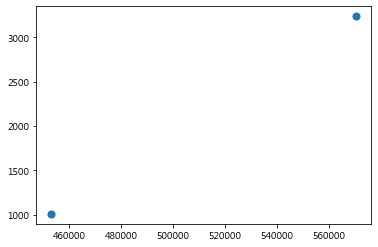

In [88]:
x=[570500,453233]
y=[3238,1010]

plt.scatter(x,y,s=50)

In [71]:
fp1=np.polyfit(x,y,1)
fp1

f1=np.poly1d(fp1)  # 전달된 계수를 함수로 생성

array([ 1.89993775e-02, -7.60114486e+03])

In [72]:
fx= np.linspace(100000,700000,100)  # 직선그래프 그리기 위한 x data
fx

fy=f1(fx)
fy

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

array([-5701.20710856, -5586.05936621, -5470.91162385, -5355.76388149,
       -5240.61613913, -5125.46839678, -5010.32065442, -4895.17291206,
       -4780.0251697 , -4664.87742735, -4549.72968499, -4434.58194263,
       -4319.43420027, -4204.28645792, -4089.13871556, -3973.9909732 ,
       -3858.84323085, -3743.69548849, -3628.54774613, -3513.40000377,
       -3398.25226142, -3283.10451906, -3167.9567767 , -3052.80903434,
       -2937.66129199, -2822.51354963, -2707.36580727, -2592.21806491,
       -2477.07032256, -2361.9225802 , -2246.77483784, -2131.62709548,
       -2016.47935313, -1901.33161077, -1786.18386841, -1671.03612605,
       -1555.8883837 , -1440.74064134, -1325.59289898, -1210.44515662,
       -1095.29741427,  -980.14967191,  -865.00192955,  -749.85418719,
        -634.70644484,  -519.55870248,  -404.41096012,  -289.26321776,
        -174.11547541,   -58.96773305,    56.18000931,   171.32775167,
         286.47549402,   401.62323638,   516.77097874,   631.9187211 ,
      

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'cctv')

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

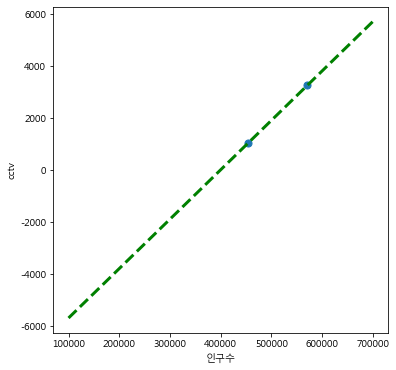

In [74]:
x=[570500,453233]
y=[3238,1010]

plt.figure(figsize=(6,6))
plt.scatter(x,y,s=50)
plt.plot(fx,fy,ls="dashed",lw=3, color="g")
plt.xlabel("인구수")
plt.ylabel("cctv")
plt.grid
plt.show()


In [61]:
# 수집 데이터를 활용해서 대표 직선 방정식 구하기
fp1=np.polyfit(data_result["인구수"],data_result["소계"],1)
fp1

f1=np.poly1d(fp1)  # 전달된 계수를 함수로 생성

array([1.15151285e-03, 1.04561312e+03])

In [67]:
fx= np.linspace(100000,700000,100) # 직선그래프 x data


fx[95:]
fy= f1(fx)
fy[95:]

array([675757.57575758, 681818.18181818, 687878.78787879, 693939.39393939,
       700000.        ])

array([1823.75664927, 1830.735515  , 1837.71438074, 1844.69324648,
       1851.67211222])

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

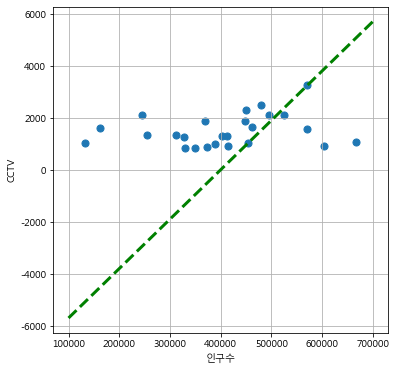

In [89]:
# 최소 오차 직선 그래프 추가
# 마커 크기 50으로 설정
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx,fy,ls='dashed',lw=3,color='g')

plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()
plt.show()


- 위 그래프의 직선의 의미
- 인구수가 400000일때 적당한 cctv 대수는 1500대 정도라는 것을 의미함

- 선근처에 분포하고 있으면 적당한 대수를 갖고 있고
- 선에서 멀어질 수록 cctv 대수가 너무 많거나 너무 적은 걸 의미한다.- 위 그래프의 직선의 의미
- 인구수가 400000일때 적당한 cctv 대수는 1500대 정도라는 것을 의미함

- 선근처에 분포하고 있으면 적당한 대수를 갖고 있고
- 선에서 멀어질 수록 cctv 대수가 너무 많거나 너무 적은 걸 의미한다.


# 각 구별 적절한 cctv 수를 계산해 오차가 많은 지역 표시하기


In [75]:
#각 구별로 적절한 cctv수를 계산
# 구별 인구수를 함수에 대입해서 y결과값 확인

f1(data_result["인구수"])


array([ 3238.        ,  1010.        , -1327.70240562,  3870.14728781,
        2383.31300366,  -530.26053365,   908.18233604, -2754.74564882,
        3216.79669472,  -977.08789344,  -580.95087279,   236.47834429,
        -198.05641826, -1385.25152004,   954.4648196 , -1687.70261028,
        1162.5080031 ,  5080.61662701,  1518.13835094,    55.31927993,
       -2961.43987652,  1791.91938056, -4507.66621471, -5069.66780083,
         274.15410985])

In [76]:
data_result["소계"]-f1(data_result["인구수"])

구별
강남구    -1.818989e-12
강동구    -1.818989e-12
강북구     2.158702e+03
강서구    -2.959147e+03
관악구    -2.743130e+02
광진구     1.408261e+03
구로구     9.758177e+02
금천구     4.102746e+03
노원구    -1.650797e+03
도봉구     1.802088e+03
동대문구    2.450951e+03
동작구     1.065522e+03
마포구     1.178056e+03
서대문구    2.639252e+03
서초구     1.342535e+03
성동구     3.014703e+03
성북구     4.884920e+02
송파구    -3.999617e+03
양천구     9.638616e+02
영등포구    1.221681e+03
용산구     5.057440e+03
은평구     3.160806e+02
종로구     6.126666e+03
중구      6.092668e+03
중랑구     6.418459e+02
Name: 소계, dtype: float64

In [78]:
# 오차를 절대값으로 계산한 후 오차열을 기준으로 내림차순 정렬
# 상위 10개 구만 추출

# cctv 부족 또는 많은상태를 표현하는 [ "오차"]필드 생성
data_result["오차"]=np.abs(data_result["소계"]-f1(data_result["인구수"]))
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1.818989e-12
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,1.818989e-12
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,2.158702e+03
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,2.959147e+03
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,2.743130e+02


In [83]:
# 오차 필드 활용해서 내림차수 ㄴ정렬 후 오차가 큰 상위 10개 구를 추출
df_sort=data_result.sort_values(by="오차",)

### 오차가 큰 상위 10개 도시 표시하기
- 그래프에 글자 출력 : plt.text(x,y,text,fontsize)
    - 점보다약간 오른쪽 아래에 출력되도록 좌표를 변경한 후 실행

- 10개를 출력 for 문을 이용


<Figure size 432x432 with 0 Axes>

Text(581910.0, 3173.24, '강남구')

Text(462297.66000000003, 989.8, '강동구')

Text(536025.3, 2066.82, '관악구')

Text(504275.76, 2065.84, '은평구')

Text(470485.2, 1617.98, '성북구')

Text(422793.06, 897.68, '중랑구')

Text(489577.56, 2432.36, '양천구')

Text(456831.48, 1846.32, '구로구')

Text(420770.4, 1275.96, '동작구')

Text(397441.98, 960.4, '마포구')

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

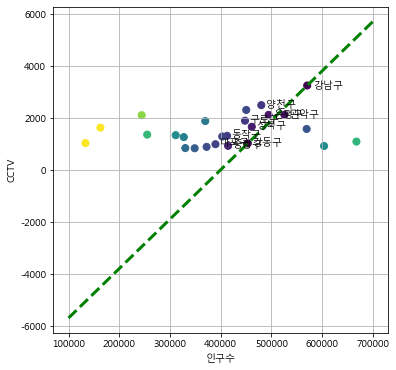

In [84]:
# 최소 오차 직선 그래프 추가
# 오차가 큰 10개 구 이름 표시
# 마커 크기 50으로 설정
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], 
            data_result['소계'],
            s=50,
           c=data_result["오차"])

plt.plot(fx,fy,ls="dashed",lw=3, color="g")

for n in range(10):
    plt.text(df_sort["인구수"][n]*1.02,
            df_sort["소계"][n]*0.98,
            df_sort.index[n],
            fontsize=10)


plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()
plt.show()
